This document provides a suggested outline for the notebook used for the data challenge. Please make sure you run this notebook before you made a submission, so that you have the code and results.

## Problem definition and task allocations.

In this section, please describe briefly:
- the problems in this project.
- how do you attribute the tasks to the team members.

You can use this Table to allocate the tasks:

| Member | Task | 
| --- | --- |
| Member 1 | Task 1 |
| --- | --- |



## Reading the data

### Read the training data

In [13]:
utility_path = '../'
import sys
sys.path.insert(1, utility_path)

from utility import read_all_test_data_from_path
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline

# Subfunction for data preprocessing.
def pre_processing(df: pd.DataFrame):
    ''' ### Description
    Preprocess the data:
    - remove outliers
    - add new features about the difference between the current and previous n data point.
    '''
    
    def remove_outliers(df: pd.DataFrame):
        ''' # Description
        Remove outliers from the dataframe based on defined valid ranges. 
        Define a valid range of temperature and voltage. 
        Use ffil function to replace the invalid measurement with the previous value.
        '''
        df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
        df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
        df['temperature'] = df['temperature'].ffill()        

        df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
        df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
        df['voltage'] = df['voltage'].ffill()        

        df['position'] = df['position'].where(df['position'] >= 0, np.nan)
        df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
        df['position'] = df['position'].ffill()


    def remove_seq_variability(df: pd.DataFrame):
        ''' # Description
        Remove the sequence-to-sequence variability.
        '''
        # Tranform the features relative to the first data point.
        df['temperature'] = df['temperature'] - df['temperature'].iloc[0]
        df['voltage'] = df['voltage'] - df['voltage'].iloc[0]
        df['position'] = df['position'] - df['position'].iloc[0]
        
    # Start processing.
    remove_outliers(df)
    remove_seq_variability(df)

In [39]:
# Ignore warnings.
warnings.filterwarnings('ignore')

# Read all the dataset. Change to your dictionary if needed.
base_dictionary = 'dataset/training_data/training_data/'
df_train = read_all_test_data_from_path(base_dictionary, pre_processing, is_plot=False)

### Read the testing data.

In [15]:
# Read all the dataset. Change to your dictionary if needed.
base_dictionary = 'dataset/testing_data/'
df_test = read_all_test_data_from_path(base_dictionary, pre_processing, is_plot=False)

## Model for motor 6.

Please copy this section for the other motors as well.

### Summary of the mode 6.

In this section, please give a brief summary of the final model you used for this motor. Important details include but not limited to:
- Which model
- What are the features you used?
- Do you tune hyperparameters? If yes, how?
- Do you consider the imbalance in the data? If yes, how?

### Training

In this section, summarize how do you train your model, and put the code here.

Model for motor 6:

 New run:

training performance, accuracy is: 0.8963429401792201
training performance, precision is: 0.9010989010989011
training performance, recall: 0.7327376116978067
training performance, F1: 0.8082437275985663



 New run:

testing performance, accuracy is: 0.15298561673688799
testing performance, precision is: 0.08280462013990565
testing performance, recall: 0.7261055634807418
testing performance, F1: 0.14865654205607476




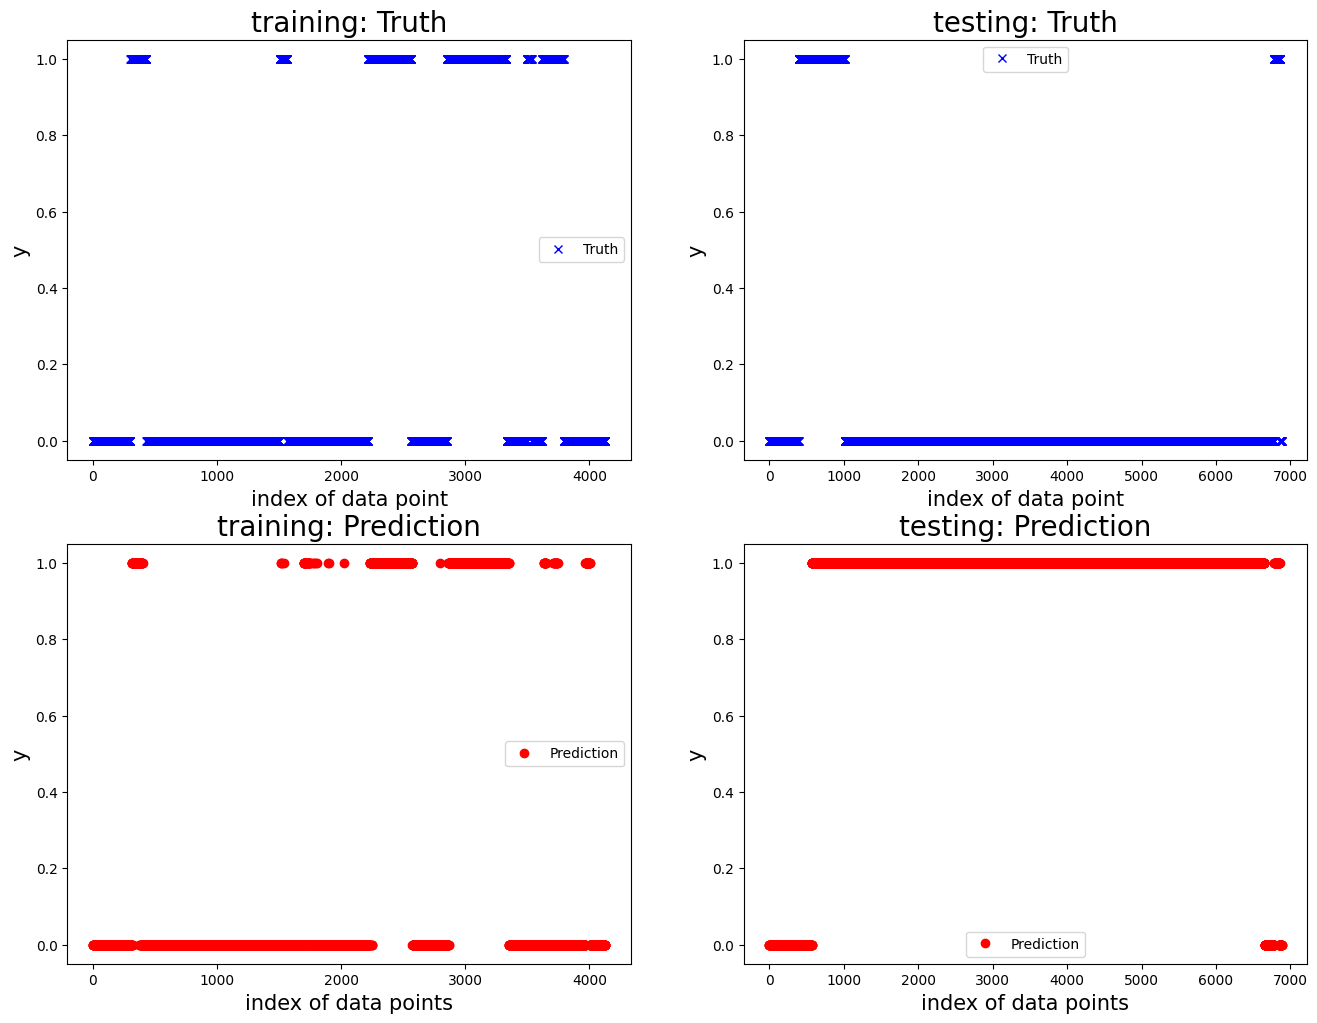


 New run:

training performance, accuracy is: 0.6180909863945578
training performance, precision is: 0.3045770934402025
training performance, recall: 0.8298850574712644
training performance, F1: 0.4456102453325104



 New run:

testing performance, accuracy is: 0.11970074812967581
testing performance, precision is: 0.11970074812967581
testing performance, recall: 1.0
testing performance, F1: 0.21380846325167038




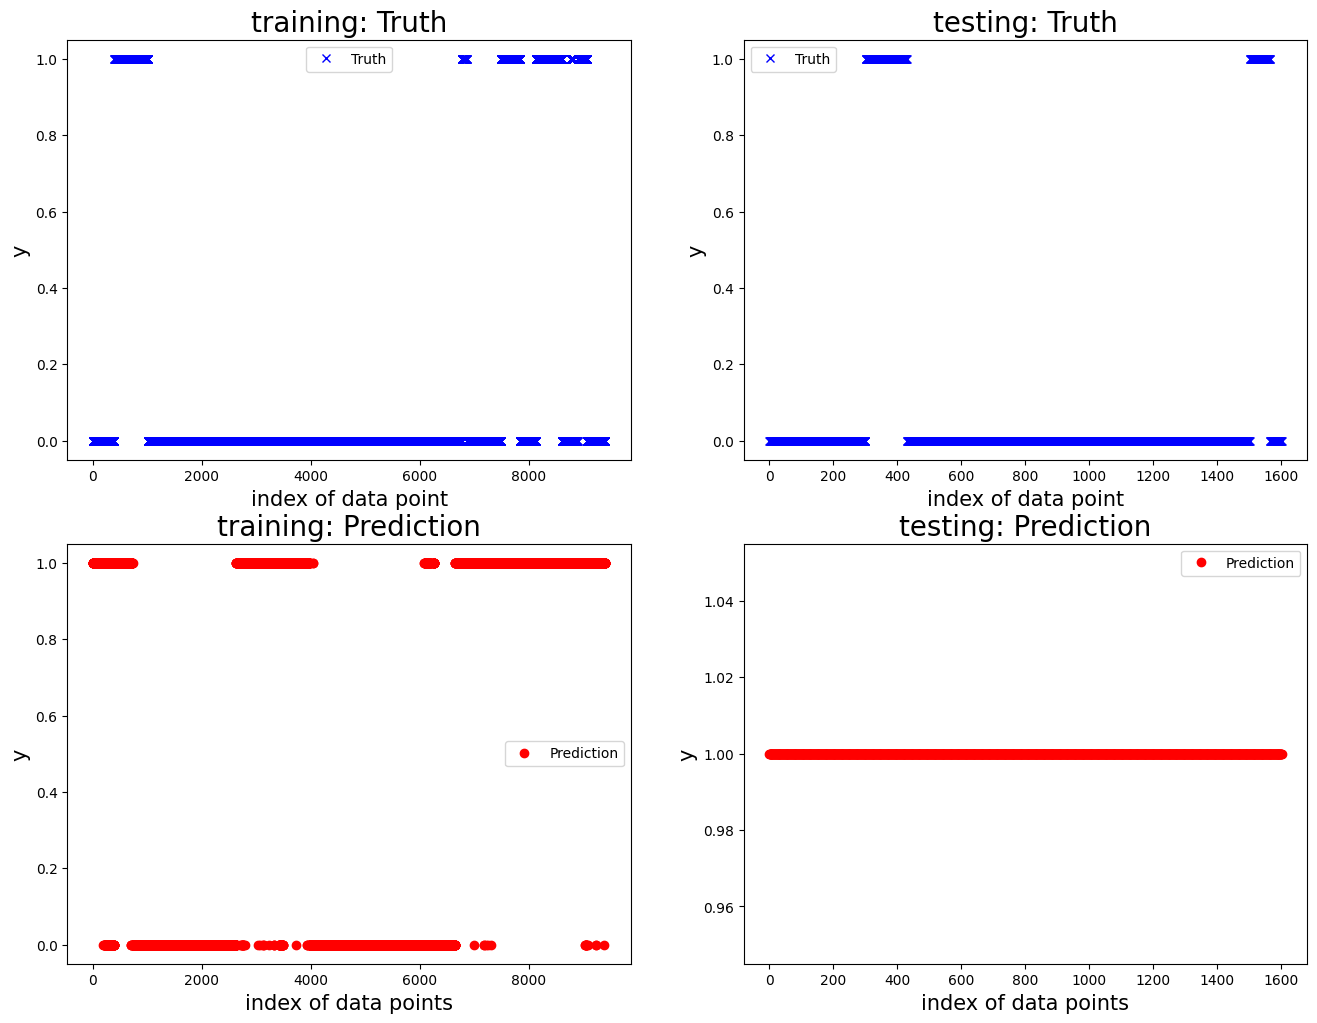


 New run:

training performance, accuracy is: 0.5870424820034472
training performance, precision is: 0.24061718098415347
training performance, recall: 0.7280757097791798
training performance, F1: 0.36169879329258736



 New run:

testing performance, accuracy is: 0.35944299390774587
testing performance, precision is: 0.31940575673166205
testing performance, recall: 0.9913544668587896
testing performance, F1: 0.48314606741573035




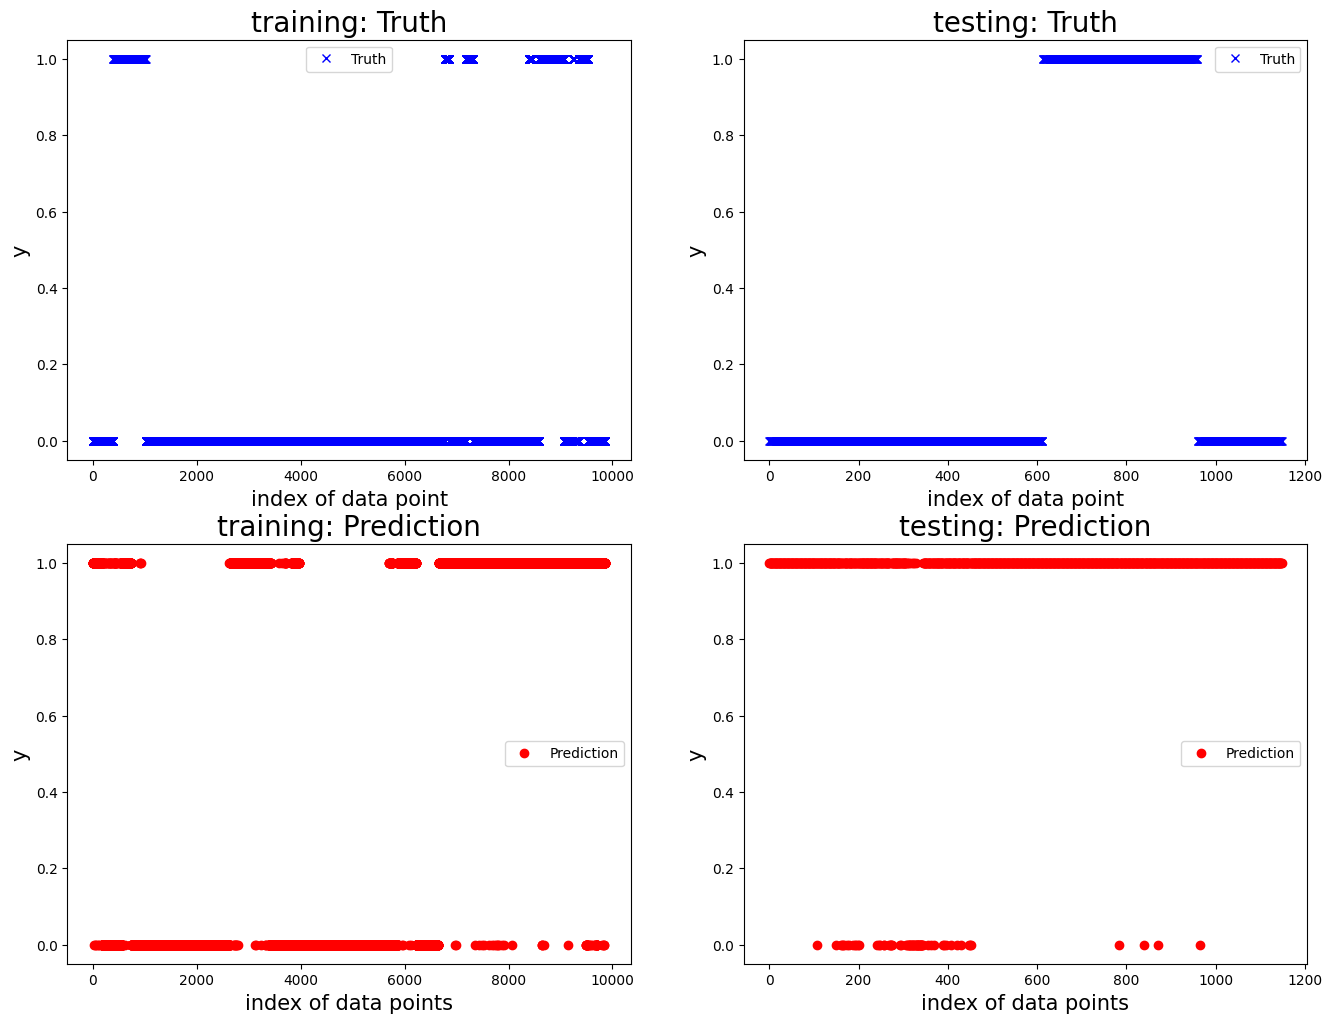


 New run:

training performance, accuracy is: 0.553922980889273
training performance, precision is: 0.21648019889895223
training performance, recall: 0.8395316804407713
training performance, F1: 0.34420443314979526



 New run:

testing performance, accuracy is: 0.679465776293823
testing performance, precision is: 0.7737642585551331
testing performance, recall: 0.8479166666666667
testing performance, F1: 0.8091451292246521




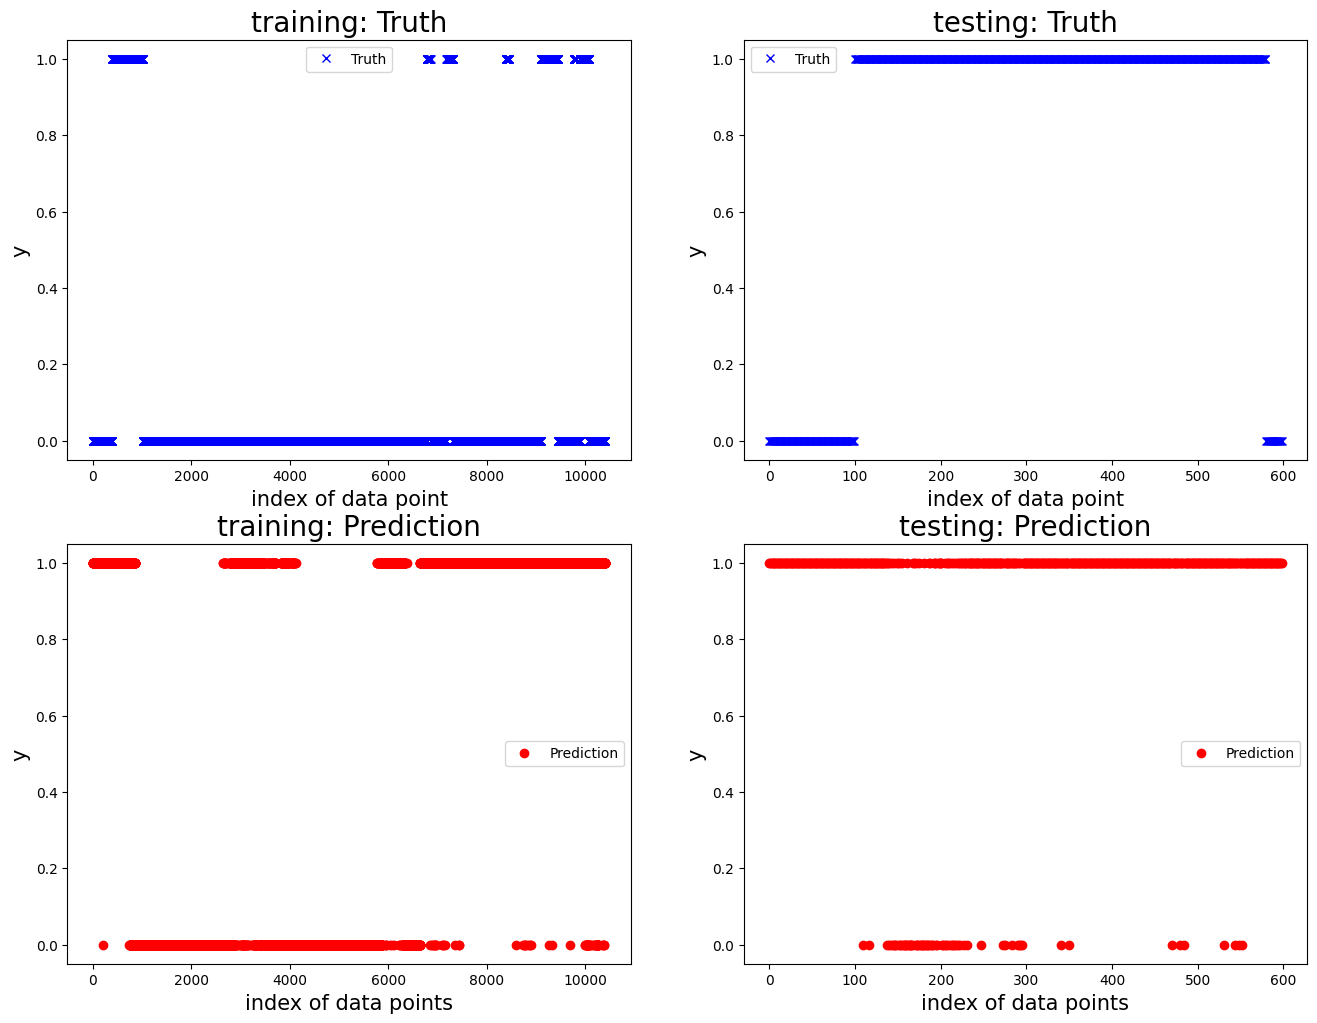


 New run:

training performance, accuracy is: 0.6645823155837811
training performance, precision is: 0.28825710754017303
training performance, recall: 0.6779069767441861
training performance, F1: 0.40450997398091937



 New run:

testing performance, accuracy is: 0.7516087516087516
testing performance, precision is: 0.5693430656934306
testing performance, recall: 0.36792452830188677
testing performance, F1: 0.4469914040114613




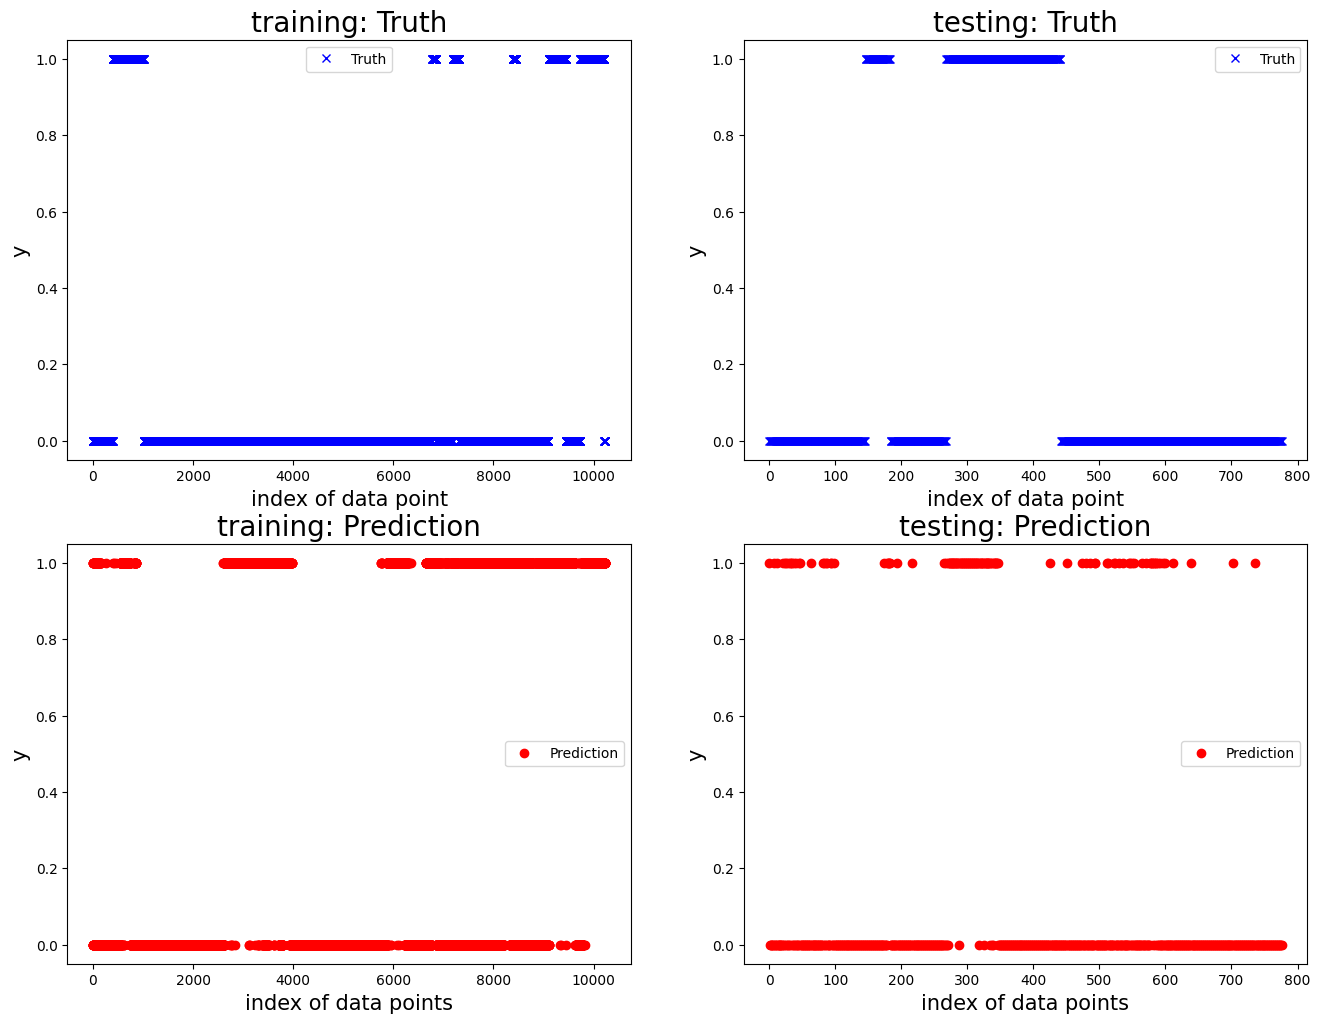

   Accuracy  Precision    Recall  F1 score
0  0.152986   0.082805  0.726106  0.148657
1  0.119701   0.119701  1.000000  0.213808
2  0.359443   0.319406  0.991354  0.483146
3  0.679466   0.773764  0.847917  0.809145
4  0.751609   0.569343  0.367925  0.446991


Mean performance metric and standard error:
Accuracy: 0.4126 +- 0.2925
Precision: 0.3730 +- 0.2960
Recall: 0.7867 +- 0.2599
F1 score: 0.4203 +- 0.2609




,Accuracy,Precision,Recall,F1 score
0,0.152986,0.082805,0.726106,0.148657
1,0.119701,0.119701,1.000000,0.213808
2,0.359443,0.319406,0.991354,0.483146
3,0.679466,0.773764,0.847917,0.809145
4,0.751609,0.569343,0.367925,0.446991


In [47]:
from utility import extract_selected_feature, prepare_sliding_window, run_cv_one_motor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Define the motor index.
motor_idx = 6

# Specify the test conditions you would like to include in the training.
df_data_experiment = df_train[df_train['test_condition'].isin(['20240425_093699', '20240425_094425', '20240426_140055',
                                                       '20240503_164675', '20240503_165189',
                                                       '20240503_163963', '20240325_155003'])]

# Define the features.
feature_list_all = ['time', 'data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                    'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                    'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                    'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                    'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                    'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']
# Extract the features.
df_tr_x, df_tr_y = extract_selected_feature(df_data_experiment,feature_list_all, motor_idx, mdl_type='clf')

# Prepare the training data based on the defined sliding window.
# window_size = 50
# sample_step = 10
# X_train, y_train = prepare_sliding_window(df_x=df_tr_x, y=None, window_size=window_size, sample_step=sample_step, mdl_type='clf')

# Il y a 19 fois plus de 0 que de 1

# Define the classification model.
# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('mdl', LogisticRegression(class_weight="balanced", n_jobs=-1))    # Step 2: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define hyperparameters to search
param_grid = {
    'mdl__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Inverse of regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=5)

feature_list = ['data_motor_1_position'
                    'data_motor_2_temperature',
                    'data_motor_3_position', 'data_motor_3_temperature',
                    'data_motor_6_temperature']

# Train the model.
run_cv_one_motor(single_run_result=True, motor_idx=6, df_data=df_data_experiment, mdl=grid_search, feature_list=feature_list, n_fold=5)

### Prediction.

In this section, put the code of prediction here. In the end, please output a variable `y_pred_6`, containing the results of the prediction on motor 1.

In [17]:
# Prepare for the testing dataset.
# Define the features.
feature_list_all = ['time', 'data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                    'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                    'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                    'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                    'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                    'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']
# Add test_condition for extracting different sequences.
feature_list_all.append('test_condition')
# Get the features.
df_test_x = df_test[feature_list_all]
# Augument the features in the same way as the training data.
X_test = prepare_sliding_window(df_x=df_test_x, window_size=window_size, sample_step=sample_step, mdl_type='clf')
# Make prediction.
y_pred_6 = grid_search.predict(X_test)

TypeError: prepare_sliding_window() missing 1 required positional argument: 'y'

## Prepare the results as a submission file for the data challenge.

In this section, we demo how to prepare the results as a submission file for the data challenge. First, we need to download the submission template `sample_submission.csv` from [kaggle](https://www.kaggle.com/competitions/robot-predictive-maintenance/data). As shown below, in this csv files, we just need to give our prediction on the six motors in the corresponding columns. You can find a demo below.

In [ ]:
import pandas as pd

# Read the template.
path = 'kaggle_data_challenge/sample_submission.csv' # Change to your path.
df_submission = pd.read_csv(path)

# Initial all values with -1.
df_submission.loc[:, ['data_motor_1_label', 'data_motor_2_label', 'data_motor_3_label', 'data_motor_4_label', 'data_motor_5_label', 'data_motor_6_label']] = -1
df_submission.head()

FileNotFoundError: [Errno 2] No such file or directory: 'kaggle_data_challenge/sample_submission.csv'

In [ ]:
# Replace each column with your prediction.
df_submission['data_motor_5_label'] = y_pred_5
df_submission['data_motor_6_label'] = y_pred_6

# For the other motors, we just fill with 0.
df_submission.loc[:, ['data_motor_1_label', 'data_motor_2_label', 'data_motor_3_label', 'data_motor_4_label']] = 0

In [ ]:
# Output the submission csv.
df_submission.to_csv('../ws_prepare_data_challenge/submission.csv')